In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [102]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

In [103]:
red_wine = pd.read_csv(red_url,sep=';')
white_wine = pd.read_csv(white_url,sep=';')
red_wine['color'] = 1
white_wine['color'] = 0

In [104]:
wine = pd.concat([red_wine,white_wine])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
fig = px.histogram(wine,x='quality',color='color')
fig.show();


In [23]:
X = wine.drop(['color'],axis=1)
y = wine.color
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)
np.unique(y_train,return_counts=True)


(array([0, 1]), array([3913, 1284]))

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'],name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'],name='Train'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()


In [32]:
wine_tree = DecisionTreeClassifier(max_depth=2,random_state=13)
wine_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [34]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train,y_pred_tr))
print('Test Acc : ', accuracy_score(y_test,y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


In [35]:
fig = go.Figure()
fig.add_traces(go.Box(y=X['fixed acidity'],name='fixed acidity'))
fig.add_traces(go.Box(y=X['chlorides'],name='chlorides'))
fig.add_traces(go.Box(y=X['quality'],name='quality'))

fig.show();

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mm, ss = MinMaxScaler(),StandardScaler()
X_ss = ss.fit_transform(X)
X_mm = mm.fit_transform(X)


In [51]:
X_ss_df = pd.DataFrame(X_ss,columns=X.columns)
X_mm_df = pd.DataFrame(X_mm,columns=X.columns)

In [54]:
fig = go.Figure()
fig.add_traces(go.Box(y=X_ss_df['fixed acidity'],name='fixed acidity'))
fig.add_traces(go.Box(y=X_ss_df['chlorides'],name='chlorides'))
fig.add_traces(go.Box(y=X_ss_df['quality'],name='quality'))
fig.show()

In [55]:
fig = go.Figure()
fig.add_traces(go.Box(y=X_mm_df['fixed acidity'],name='fixed acidity'))
fig.add_traces(go.Box(y=X_mm_df['chlorides'],name='chlorides'))
fig.add_traces(go.Box(y=X_mm_df['quality'],name='quality'))
fig.show()

In [73]:
X = X_ss_df
y = wine.color
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [67]:
fig=go.Figure()
fig.add_traces(go.Histogram(x=X_train.quality,name='Train'))
fig.add_traces(go.Histogram(x=X_test.quality,name='Test'))

fig.update_layout(barmode='overlay')

In [75]:
de = DecisionTreeClassifier(max_depth=2,random_state=13)
de.fit(X_train,y_train)
y_pred_tr = de.predict(X_train)
y_pred_ts = de.predict(X_test)
print(accuracy_score(y_pred_ts,y_test))

0.9569230769230769


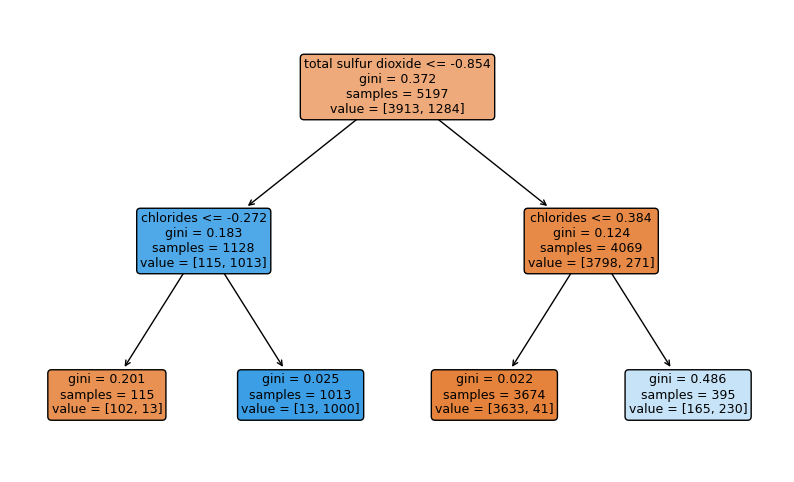

In [77]:
import sklearn.tree as tree
plt.figure(figsize=(10,6))
tree.plot_tree(de,feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [122]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine.quality]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1.0


In [125]:
de = DecisionTreeClassifier(max_depth=2,random_state=13)

X = wine.drop(['quality','taste'],axis=1)
y = wine['taste']

X_ss = ss.fit_transform(X)
X_ss = pd.DataFrame(X_ss,columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_ss,y,test_size=0.2, random_state=13)
de.fit(X_train,y_train)

y_pred_train = de.predict(X_train)
y_pred_test = de.predict(X_test)
print(accuracy_score(y_pred_test,y_test))

0.7161538461538461


In [121]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

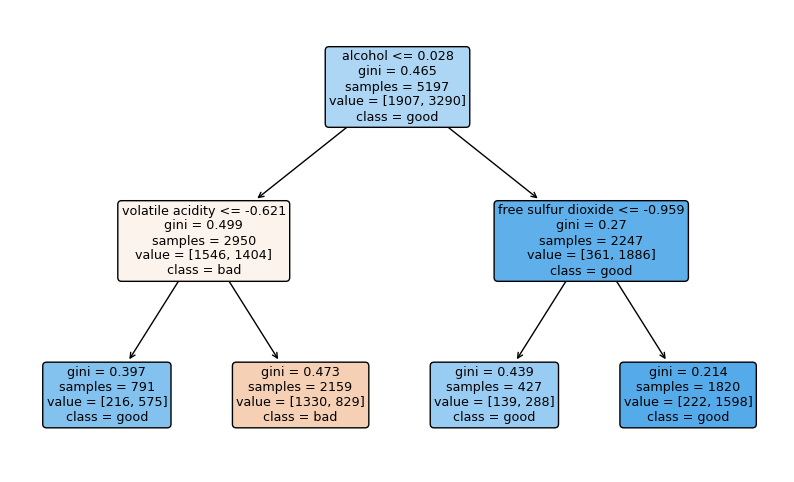

In [127]:
plt.figure(figsize=(10,6))
tree.plot_tree(de,feature_names=X.columns,class_names=['bad','good'],filled=True,rounded=True)
plt.show()